<a href="https://colab.research.google.com/github/dhinakaran209/GenerativeAIChatbot/blob/main/LPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install opencv-python
!pip install pytesseract
!pip install twilio
!apt-get install tesseract-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [3]:
import cv2
import numpy as np
import pytesseract
import re
from google.colab.patches import cv2_imshow

In [50]:
frameWidth = 640    #Frame Width
franeHeight = 480   # Frame Height

plateCascade = cv2.CascadeClassifier("/content/haarcascade_russian_plate_number.xml")
minArea = 500

In [51]:
cap =cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,franeHeight)
cap.set(10,150)
count = 0

Detected Number Plate: H982 FKL



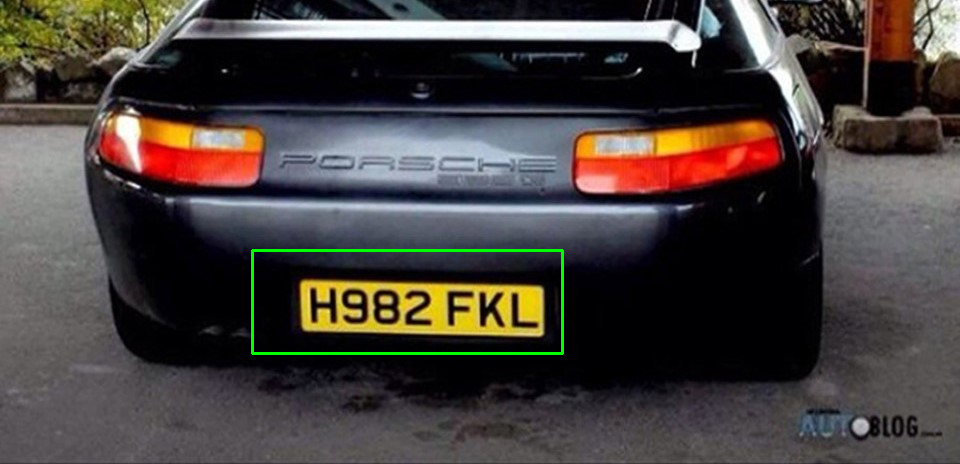

In [46]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pytesseract

# Load the image
image_path = "/content/image2.jpg"  # Replace with the actual image path
img = cv2.imread(image_path)

# Load the pre-trained Haar Cascade for license plate detection
plate_cascade = cv2.CascadeClassifier("/content/haarcascade_russian_plate_number.xml")

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply image pre-processing to enhance text visibility
img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
img_gray = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Detect license plates in the image
number_plates = plate_cascade.detectMultiScale(img_gray, 1.1, 4)

# Initialize pytesseract with the correct path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Iterate through detected plates and extract and print the number
for (x, y, w, h) in number_plates:
    plate_img = img[y:y + h, x:x + w]  # Crop the plate region
    number = pytesseract.image_to_string(plate_img, config='--psm 7 tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    print("Detected Number Plate:", number)

# Draw rectangles around detected plates
for (x, y, w, h) in number_plates:
    result2 = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with detected plates
cv2_imshow(result2)


In [52]:
# Sample dictionary of car owner information
def remove(string):
    return np.char.replace(string, ' ', '')

# Recognized license plate number
recognized_plate_number = remove(number)
recognized_plate_number = str(recognized_plate_number)
recognized_plate_number = recognized_plate_number.replace(",", "").replace(".", "").replace("-", "").replace("!","")
print(recognized_plate_number)
  # Replace with the recognized plate number from your code


H982FKL



In [53]:
# Create a dictionary of car owner information
car_owner_info = {
    "HR26BR9044": {"owner_name": "John", "mobile_number": "1234567890"},
    "H982FKL": {"owner_name": "Alice", "mobile_number": "9876543210"},
    # Add more entries as needed
}
print(recognized_plate_number)

# Check if the recognized plate number exists in the dictionary
if recognized_plate_number in car_owner_info:
    owner_info = car_owner_info[recognized_plate_number]
    owner_name = owner_info["owner_name"]
    mobile_number = owner_info["mobile_number"]

    # Simulate sending an SMS
    print(f"Sending SMS to {mobile_number}: Hello {owner_name}, your car has been detected.")
else:
    print("License plate not found in the dictionary")



H982FKL

License plate not found in the dictionary
